In [3]:
#dependencies
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import random
from config import API_key
from datetime import datetime

In [4]:
from citipy import citipy
from ratelimiter import RateLimiter

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

# read up to 750 records to obtain target of 500 in case missing records
while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
    
#create data frame of randome latitude and longitude coordinates
coordinates_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
 
# Print the number of coordinates to confirm sufficient count of cities
len(coordinates_df)

750

In [10]:
# print to confirm the data frame structure
coordinates_df.head()

,lat,lon
0,62.707082,-85.823168
1,-57.204049,-72.900691
2,-48.253528,166.742310
3,-31.429202,127.117327
4,-25.864311,-91.304924


In [11]:
#pass coordinates through citypy module to convert to cities
city = []
country = []


for index, row in coordinates_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,attawapiskat,ca
1,punta arenas,cl
2,riverton,nz
3,esperance,au
4,pisco,pe


In [12]:
# create list to hold weather data
weather_data=[]

In [27]:
#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={API_key}&units={units}&q="

#install rate limiter for API call maxing out at 50 records every minute
rate_limiter = RateLimiter(max_calls=50, period=60)

#for loop reading in API records, print log to track city data processing
for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=index
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{record_counter} -- {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue
 

Weather for attawapiskat not found.
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #2 -- riverton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=riverton
----------------------------------------------------------------
Processing record #3 -- esperance
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=esperance
----------------------------------------------------------------
Processing record #4 -- pisco
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pisco
----------------------------------------------------------------
Processing record #5 -- coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=coquimbo
----------

Processing record #46 -- castro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=castro
----------------------------------------------------------------
Processing record #47 -- georgetown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=georgetown
----------------------------------------------------------------
Processing record #48 -- aklavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aklavik
----------------------------------------------------------------
Processing record #49 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #50 -- victoria
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=victoria
----------------------------------------------------------------
Processing record #51 -- kargasok
http://api.open

Processing record #93 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #94 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #95 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #96 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Processing record #97 -- port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port elizabeth
----------------------------------------------------------------
Processing record #98 -- he

Processing record #139 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Processing record #140 -- bac giang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bac giang
----------------------------------------------------------------
Weather for grand river south east not found.
----------------------------------------------------------------
Processing record #142 -- peniche
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=peniche
----------------------------------------------------------------
Processing record #143 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #144 -- avarua
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=avarua
----

Processing record #185 -- saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-philippe
----------------------------------------------------------------
Processing record #186 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #187 -- nianzishan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nianzishan
----------------------------------------------------------------
Processing record #188 -- chirongui
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chirongui
----------------------------------------------------------------
Processing record #189 -- rabo de peixe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rabo de peixe
----------------------------------------------------------------
Proces

Processing record #228 -- husavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=husavik
----------------------------------------------------------------
Processing record #229 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #230 -- zhireken
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=zhireken
----------------------------------------------------------------
Processing record #231 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #232 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Processing record #233 -- husavik
http://api.o

Processing record #273 -- taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=taoudenni
----------------------------------------------------------------
Weather for grand river south east not found.
----------------------------------------------------------------
Processing record #275 -- ngunguru
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ngunguru
----------------------------------------------------------------
Processing record #276 -- constitucion
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=constitucion
----------------------------------------------------------------
Processing record #277 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #278 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperi

Processing record #317 -- thompson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=thompson
----------------------------------------------------------------
Processing record #318 -- chapleau
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chapleau
----------------------------------------------------------------
Processing record #319 -- ndago
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ndago
----------------------------------------------------------------
Processing record #320 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #321 -- trairi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=trairi
----------------------------------------------------------------
Processing record #322 -- marienburg
http://api.

Processing record #361 -- markivka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=markivka
----------------------------------------------------------------
Processing record #362 -- taggia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=taggia
----------------------------------------------------------------
Processing record #363 -- ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ponta delgada
----------------------------------------------------------------
Processing record #364 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #365 -- majene
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=majene
----------------------------------------------------------------
Weather for barentsburg not found.
-

Processing record #406 -- esperance
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=esperance
----------------------------------------------------------------
Processing record #407 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #408 -- ahipara
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ahipara
----------------------------------------------------------------
Processing record #409 -- parrita
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=parrita
----------------------------------------------------------------
Processing record #410 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #411 -- bethel
http:

Processing record #452 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #453 -- laguna
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=laguna
----------------------------------------------------------------
Processing record #454 -- gamba
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=gamba
----------------------------------------------------------------
Processing record #455 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Processing record #456 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #457 -- daru
http://api.openweathermap.org/d

Processing record #496 -- townsville
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=townsville
----------------------------------------------------------------
Processing record #497 -- bumba
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bumba
----------------------------------------------------------------
Processing record #498 -- embu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=embu
----------------------------------------------------------------
Processing record #499 -- chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chokurdakh
----------------------------------------------------------------
Processing record #500 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Processing record #501 -- altay
http://api.openwea

Processing record #542 -- lata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lata
----------------------------------------------------------------
Processing record #543 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #544 -- hue
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hue
----------------------------------------------------------------
Processing record #545 -- uusikaupunki
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=uusikaupunki
----------------------------------------------------------------
Processing record #546 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Processing record #547 -- sao felix do xingu
htt

Processing record #587 -- ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ketchikan
----------------------------------------------------------------
Processing record #588 -- broken hill
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=broken hill
----------------------------------------------------------------
Processing record #589 -- hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hithadhoo
----------------------------------------------------------------
Processing record #590 -- saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-pierre
----------------------------------------------------------------
Processing record #591 -- ler
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ler
----------------------------------------------------------------
Weather for handwara not found.


Processing record #633 -- conde
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=conde
----------------------------------------------------------------
Processing record #634 -- zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=zhigansk
----------------------------------------------------------------
Processing record #635 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #636 -- sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sao felix do xingu
----------------------------------------------------------------
Weather for nizhneyansk not found.
----------------------------------------------------------------
Processing record #638 -- arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperi

Processing record #680 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #681 -- grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=grand gaube
----------------------------------------------------------------
Processing record #682 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #683 -- sabang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sabang
----------------------------------------------------------------
Processing record #684 -- marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=marsh harbour
----------------------------------------------------------------
Processing record #685 -- ba

Weather for stornoway not found.
----------------------------------------------------------------
Processing record #726 -- lagoa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lagoa
----------------------------------------------------------------
Processing record #727 -- esperance
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=esperance
----------------------------------------------------------------
Weather for attawapiskat not found.
----------------------------------------------------------------
Processing record #729 -- goderich
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=goderich
----------------------------------------------------------------
Weather for sentyabrskiy not found.
----------------------------------------------------------------
Processing record #731 -- georgetown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=georgeto

In [16]:
#Convert raw weather/city data to a dataframe
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Punta Arenas,CL,-53.16,54.34,62,40,16.11
1,Riverton,US,43.02,31.06,85,1,12.17
2,Esperance,TT,10.24,77.00,94,75,3.36
3,Pisco,PE,-13.71,71.60,30,20,5.82
4,Coquimbo,CL,-29.95,62.60,77,75,6.93


In [17]:
#convert weather data frame to a csv file
weather_df.to_csv("weather_data.csv")

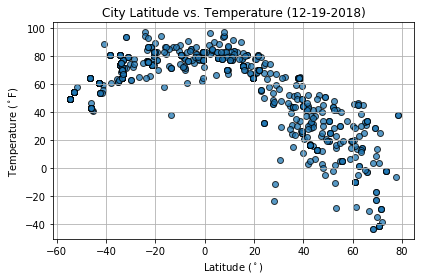

In [22]:
# First weather plot of latitude and longitude
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clattemp.png")
plt.show()

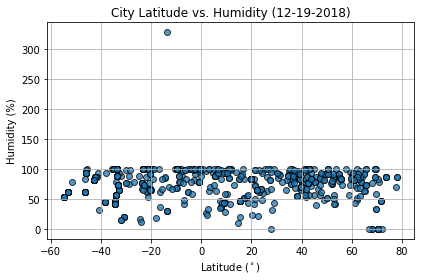

In [23]:
# Second weather plot of latitude vs. humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clathumidity.png")
plt.show()

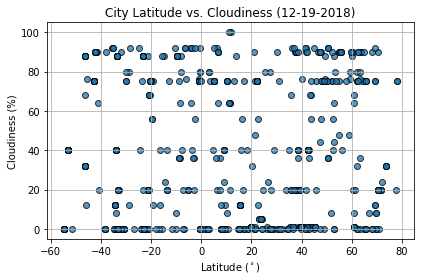

In [24]:
#City latitude vs. Cloudiness

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clatclouds.png")
plt.show()

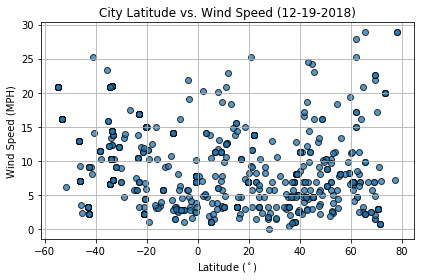

In [25]:
# City latitude vs. Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clatwind.png")
plt.show()